<a href="https://colab.research.google.com/github/codegithubka/Physics-4AL-Gooogle-Collab-Files/blob/main/PostLab3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('drive')

Mounted at drive


Plotting the displacement vs Force

Text(0.5, 0, 'Force')

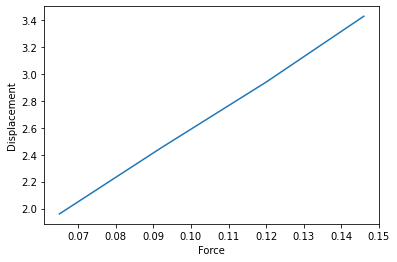

In [2]:
force = [0.2*9.8, 0.25*9.8, 0.3*9.8, 0.35*9.8]
displacement = [0.065, 0.092, 0.12, 0.146]

plt.plot(displacement, force)
plt.ylabel("Displacement")
plt.xlabel("Force")

Determine Spring Constant with Uncertainty

In [3]:
#Let spring constant be k
from numpy.lib.nanfunctions import nanprod
coeff_linear, cov = np.polyfit(force, displacement,1,cov=True)
# The slope of this curve is the velocity pre-collision
slope = coeff_linear[0]
print(slope)

k = 1/slope

print(k)


0.05530612244897958
18.08118081180812


Calculate Uncertainty

In [4]:
delta_k = k*0.001/0.3
print(delta_k)


0.06027060270602708


Import Calibration Data

In [5]:
x_cal = np.loadtxt('/content/drive/MyDrive/PHYSICS4AL/Unit 3 - Oscillations/3A/3AXAxis.txt', delimiter=',')
y_cal = np.loadtxt('/content/drive/MyDrive/PHYSICS4AL/Unit 3 - Oscillations/3A/3AYAxis.txt', delimiter=',')
z_cal = np.loadtxt('/content/drive/MyDrive/PHYSICS4AL/Unit 3 - Oscillations/3A/3AZAxis.txt', delimiter=',')
osc = np.loadtxt('/content/drive/MyDrive/PHYSICS4AL/Unit 3 - Oscillations/3A/cycles.txt', delimiter=',')

In [6]:
xx = x_cal[:,2]
xy = x_cal[:,3]
xz = x_cal[:,4]

yx = y_cal[:,2]
yy = y_cal[:,3]
yz = y_cal[:,4]

zx = z_cal[:,2]
zy = z_cal[:,3]
zz = z_cal[:,4]

zx_std = np.std(zx)
zy_std = np.std(zy)
zz_std = np.std(zz)

yx_std = np.std(yx)
yy_std = np.std(yy)
yz_std = np.std(yz)

xx_std = np.std(xx)
xy_std = np.std(xy)
xz_std = np.std(xz)

print('Standard Deviation for xx, xy, xz')
print(xx_std, xy_std, xz_std)

Standard Deviation for xx, xy, xz
184.05047799423258 59.103382558595364 158.4404096862606


In [7]:
print('Standard Deviation for yx, yy, yz')
print(yx_std, yy_std, yz_std)

Standard Deviation for yx, yy, yz
49.62637262085687 61.03047606126354 84.81399190664531


In [8]:
print('Standard Deviation for zx, zy, zz')
print(zx_std, zy_std, zz_std)

Standard Deviation for zx, zy, zz
47.220944251571204 41.418416368735784 81.32173442442013


In [9]:
xx_mean = np.mean(xx)
xy_mean = np.mean(xy)
xz_mean = np.mean(xz)

yx_mean = np.mean(yx)
yy_mean = np.mean(yy)
yz_mean = np.mean(yz)

zx_mean = np.mean(zx)
zy_mean = np.mean(zy)
zz_mean = np.mean(zz)

In [10]:
print('Mean for xx, xy, xz')
print(xx_mean, xy_mean, xz_mean)
print('\n')

print('Mean for yx, yy, yz')
print(yx_mean, yy_mean, yz_mean)
print('\n')

print('Mean for zx, zy, zz')
print(zx_mean, zy_mean, zz_mean)

Mean for xx, xy, xz
-16101.826086956522 444.0869565217391 -1430.3695652173913


Mean for yx, yy, yz
969.6363636363636 16317.90909090909 -377.3636363636364


Mean for zx, zy, zz
-1031.7551020408164 123.6734693877551 16072.142857142857


Slope: -0.0005599196140252447
Intercept: 0


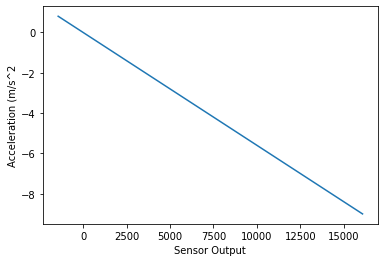

In [11]:
y1 = 0
y2 = -9.8
x1 = xz_mean
x2 = zz_mean

def calibration_line(x1, y1, x2, y2):
  slope = (y2-y1)/(x2-x1)
  y_int = y1
  return [slope, y_int]

line = calibration_line(x1, y1, x2, y2)
slope = line[0]
intercept = line[1]

x_axis = np.linspace(xz_mean, zz_mean, 100)
plt.plot(x_axis, slope*x_axis+intercept)

plt.xlabel('Sensor Output')
plt.ylabel('Acceleration (m/s^2')

print('Slope: ' +str(slope))
print('Intercept: '+ str(intercept))

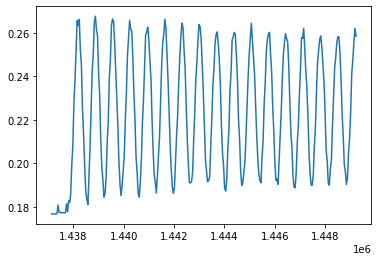

In [22]:
osc_dist = osc[:,1]
osc_time = osc[:,0]
plt.plot(osc_time,osc_dist/100)

Text(0.5, 1.0, 'Displacement vs array index')

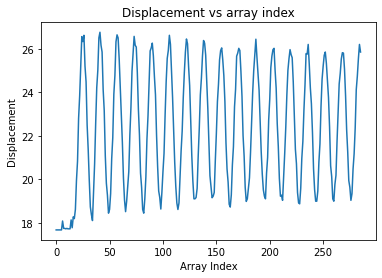

In [15]:
# Plot the position of m1 vs array index
array_index=np.arange(0,len(osc_dist))
# Use plt.plot(position_m1)
plt.plot(array_index, osc_dist)

# Use axes labels
plt.xlabel('Array Index')
plt.ylabel('Displacement')
plt.title('Displacement vs array index')

Text(0.5, 1.0, 'Displacement vs Time')

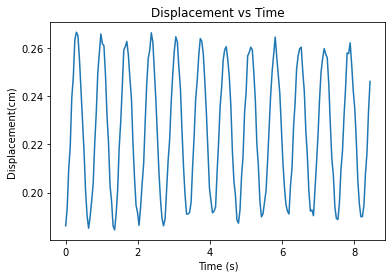

In [26]:
n_osc = osc[50:250]
n_dist = n_osc[:,1]
n_time = n_osc[:,0]
n_time = n_time - n_time[0] #convert to sceonds
n_time = n_time/1000

plt.plot(n_time, n_dist/100)
plt.xlabel('Time (s)')
plt.ylabel('Displacement(cm)')
plt.title('Displacement vs Time')


Text(0.5, 1.0, 'Acceleration vs Time')

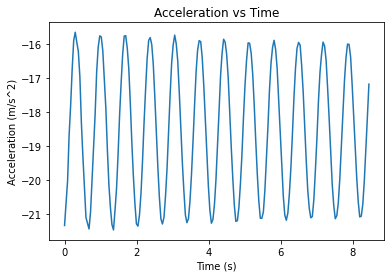

In [27]:
x_a = osc[:,2]

relative_a = slope*x_a + intercept - 9.81

plt.plot(n_time, relative_a[50:250])
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')